# Preprocessing the data :)

In [120]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [121]:
train_samples = []
train_labels  = []

In [122]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [123]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

train_labels, train_samples = shuffle(train_labels, train_samples)

In [124]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [125]:
scaled_train_samples

array([[0.34482759],
       [0.27586207],
       [0.11494253],
       ...,
       [0.27586207],
       [0.66666667],
       [0.47126437]])

# Simple tf.keras Sequencial Model

In [126]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [127]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
Num GPUs Available:  0


In [128]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [129]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                32        
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [131]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6503 - accuracy: 0.5524 - val_loss: 0.6405 - val_accuracy: 0.5429 - 555ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6198 - accuracy: 0.6228 - val_loss: 0.6096 - val_accuracy: 0.6714 - 136ms/epoch - 718us/step
Epoch 3/30
189/189 - 0s - loss: 0.5922 - accuracy: 0.6947 - val_loss: 0.5820 - val_accuracy: 0.7048 - 134ms/epoch - 708us/step
Epoch 4/30
189/189 - 0s - loss: 0.5655 - accuracy: 0.7413 - val_loss: 0.5537 - val_accuracy: 0.7571 - 136ms/epoch - 720us/step
Epoch 5/30
189/189 - 0s - loss: 0.5385 - accuracy: 0.7688 - val_loss: 0.5250 - val_accuracy: 0.8048 - 133ms/epoch - 703us/step
Epoch 6/30
189/189 - 0s - loss: 0.5110 - accuracy: 0.7984 - val_loss: 0.4957 - val_accuracy: 0.8286 - 135ms/epoch - 717us/step
Epoch 7/30
189/189 - 0s - loss: 0.4833 - accuracy: 0.8286 - val_loss: 0.4665 - val_accuracy: 0.8381 - 134ms/epoch - 711us/step
Epoch 8/30
189/189 - 0s - loss: 0.4558 - accuracy: 0.8444 - val_loss: 0.4373 - val_accuracy: 0.8714 - 135ms/epoch

In [132]:
test_samples = []
test_labels  = []
for i in range(50):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
test_samples = np.array(train_samples)
test_labels = np.array(train_labels)

test_labels, test_samples = shuffle(test_labels, test_samples)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))
scaled_test_samples

array([[0.85057471],
       [0.49425287],
       [0.24137931],
       ...,
       [0.66666667],
       [0.49425287],
       [0.66666667]])

In [135]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [136]:
for i in predictions:
    print(i)
    
# Not side effect  -    Side effect

[0.04537872 0.95462126]
[0.7035418  0.29645815]
[0.9600462  0.03995385]
[0.39130685 0.6086931 ]
[0.9602661  0.03973396]
[0.6396832  0.36031684]
[0.05709863 0.94290143]
[0.04207291 0.95792705]
[0.94290054 0.05709951]
[0.10252444 0.89747554]
[0.06690316 0.9330968 ]
[0.85004026 0.14995983]
[0.05274605 0.9472538 ]
[0.1483166  0.85168344]
[0.0167161 0.9832839]
[0.39130685 0.6086931 ]
[0.05274605 0.9472538 ]
[0.08456452 0.9154355 ]
[0.86761487 0.13238516]
[0.02659838 0.97340167]
[0.08456452 0.9154355 ]
[0.04893103 0.95106894]
[0.02872477 0.97127527]
[0.04537872 0.95462126]
[0.80917907 0.19082095]
[0.6724098  0.32759017]
[0.01806713 0.9819329 ]
[0.26458222 0.7354178 ]
[0.9574079  0.04259214]
[0.0361395 0.9638605]
[0.26458222 0.7354178 ]
[0.9600462  0.03995385]
[0.9602661  0.03973396]
[0.78576237 0.21423762]
[0.10252444 0.89747554]
[0.32474408 0.67525584]
[0.01952518 0.98047477]
[0.89754725 0.10245273]
[0.03899806 0.96100193]
[0.46217483 0.5378251 ]
[0.85004026 0.14995983]
[0.94639057 0.053609

In [137]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [138]:
for i in rounded_predictions:
    print(i)

1
0
0
1
0
0
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
0
1
1
0
0
0
1
1
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
0
1
1
0
0
0
0
1
1
1
1
1
1
0
0
1
1
0
0
1
1
1
0
0
1
0
0
1
0
1
1
0
0
0
1
0
0
1
1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
1
0
1
1
1
1
1
0
1
0
0
1
1
1
0
1
0
0
1
1
0
0
1
0
0
1
1
0
0
1
1
1
0
1
0
0
1
0
0
1
1
0
1
1
0
1
1
0
0
1
0
1
1
0
1
0
1
0
0
0
0
1
1
1
1
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
0
0
1
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
0
0
1
1
1
1
0
1
1
0
0
1
0
1
0
0
1
0
1
0
1
1
1
1
1
0
1
1
0
0
0
1
0
0
0
0
0
1
1
1
1
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
0
0
1
1
1
1
0
1
1
0
1
0
1
1
0
1
1
0
0
0
1
0
1
1
1
0
0
1
0
0
0
0
0
0
1
1
1
1
1
0
0
1
1
1
1
0
0
0
1
0
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
0
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
1
0
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
0
0
1
1
0
1
0
1
1
1
1
0
1
0
0
0
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
1
1
0
1
0
0
1
0
1
1
0
1
1
1
0
1
0
0
0
1
1
1
0
0
0
1
0
1
0
0
1
0
1


# Confusion Matrix

In [139]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [140]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [145]:
def plot_confusion_matrix(cm, 
                          classes, 
                          normalize=False, 
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') /cm.sum(axis=1)[:, np.newaxis]
        print("Normalizes confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 951   99]
 [  41 1009]]


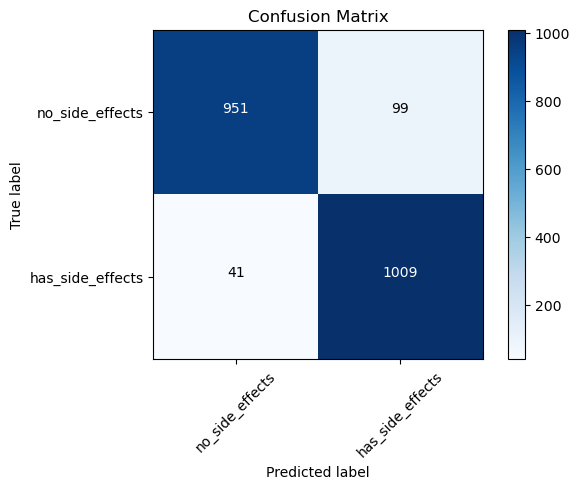

In [146]:
cm_plot_labels = ['no_side_effects', 'has_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
import os.path
if os.path.isfile('models/medical_trial_model.h5')
    model.save('models')